## IBM Data Science Project Capstone

Name            : Fitrie Ratnasari\
Origin          : Indonesia\
Date            : October 1st, 2020\
Name of Project : Seattle Collision Severity Case 

### Business Understanding

World Health Organization in early 2020 stated that every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.

Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.

In order to reduce traffic accident in Seatlle, Police Department is going to apply new approach of early-alert system that could prevent accidents. Such an approach takes into account people's vulnerability to serious injuries in road traffic crashes. The cornerstones of this approach by predicting severity collition type with condition given such as vehicle speed, weather, road condition, visibility, number of pedestrian and vehicle, that become major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing early warning to the local government, police and drivers on the targeted roads.


### Data Understanding 

The data was gathered from the Seattle Department of Transportation (SDOT) Traffic Management Division from 2004 to 2020 in csv format.\
It consists of 37 independent variables and 194,673 rows. The dependent variable which becomes target, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident from 0 to 4, as following :\
\
0: Little to no Probability (Clear Conditions)\
1: Very Low Probability — Chance or Property Damage\
2: Low Probability — Chance of Injury\
3: Mild Probability — Chance of Serious Injury\
4: High Probability — Chance of Fatality\
\
Particularly in the data given, severity type will only be 1 and 2.

In this section, we'd like to know the trend of collision accident in Seattle, skewness of the dataset, the correlation of each attributes in the data (of which later the most predictable variable of accident will be chosen to train the data) and to know how correlate weather, road condition and visibility combination to collisions. 

**a. Trend of Collision in Seattle**


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Data-Collisions.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df1['year'] = pd.DatetimeIndex(df['INCDTTM']).year
df1.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,2004


In [23]:
data =[['2004', 11865],
        ['2005', 15115],
        ['2006', 15188],
        ['2007', 14456],
        ['2008', 13660],
        ['2009', 11734],
        ['2010', 10808],
        ['2011', 10919],
        ['2012', 10907],
        ['2013', 10577],
        ['2014', 11841],
        ['2015', 12995],
        ['2016', 11659],
        ['2017', 10873],
        ['2018', 10419],
        ['2019', 9412],
        ['2020', 2245]]

df_year = pd.DataFrame (data, columns = ['Year','Total Collisions']).set_index('Year')
print (df_year)
  

      Total Collisions
Year                  
2004             11865
2005             15115
2006             15188
2007             14456
2008             13660
2009             11734
2010             10808
2011             10919
2012             10907
2013             10577
2014             11841
2015             12995
2016             11659
2017             10873
2018             10419
2019              9412
2020              2245


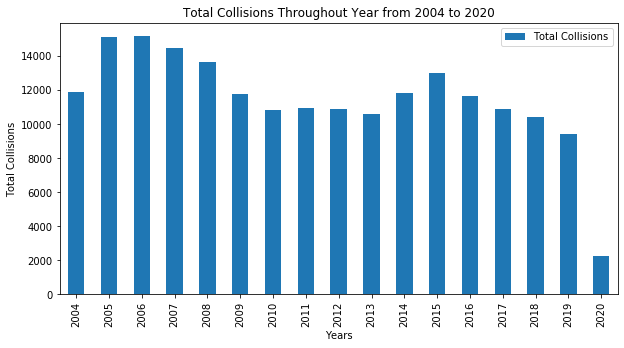

In [27]:
df_year.plot(kind='bar', 
             #alpha=0.25, # 0-1, default value a= 0.5
             stacked=True,
             figsize=(10, 5),
            )

plt.title('Total Collisions Throughout Year from 2004 to 2020')
plt.ylabel('Total Collisions')
plt.xlabel('Years')

plt.show()

From figure above we can say, the trend of collisions accured has been declining from 2005 to 2013, but then rise up in 2014 to 2015 and starting to gradually declining in 2016 to 2019.


**b. Skewness of Dataset**

Another information can be obtained from the data is skewness, which this element takes an important role for accuracy especially in Classification. The data supposed to be balanced before we input the train dataset to classification machine learning algorithm. We need to check whether the data is balance or otherwise. 

In [28]:
severity_count = df['SEVERITYCODE'].value_counts().to_frame()

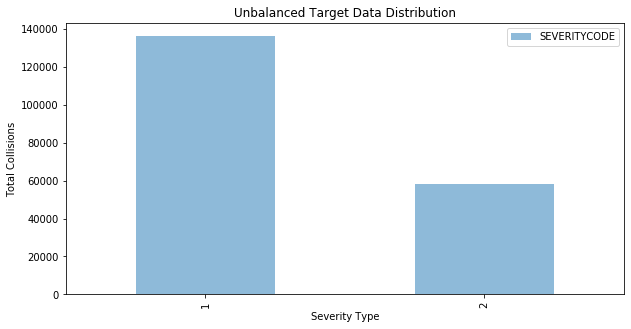

In [30]:
%matplotlib inline
severity_count.plot(kind='bar', 
             alpha=0.5, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(10, 5),
            )

plt.title('Unbalanced Target Data Distribution')
plt.ylabel('Total Collisions')
plt.xlabel('Severity Type')

plt.show()

Now we know the dataset are unbalanced and need rebalancing later in pre-processing.

**c. Correlation of Attributes**

Before doing machine learning algorithm, we need to determine the feature or attributes that being most predictable variables to collision as a target.\
The most predictable variables choosen in training set, the higher accuracy will be achieved. 

As we know the data types are varied one to another, then currently (before doing any data wrenching) we can only know the correlation between variables in integer type (object type will be excluded). 
We'll be doing the preprocessing in the next section to do final assessment on each variable given.\
As of now, the correlation of attributes in integer type are in figure below :

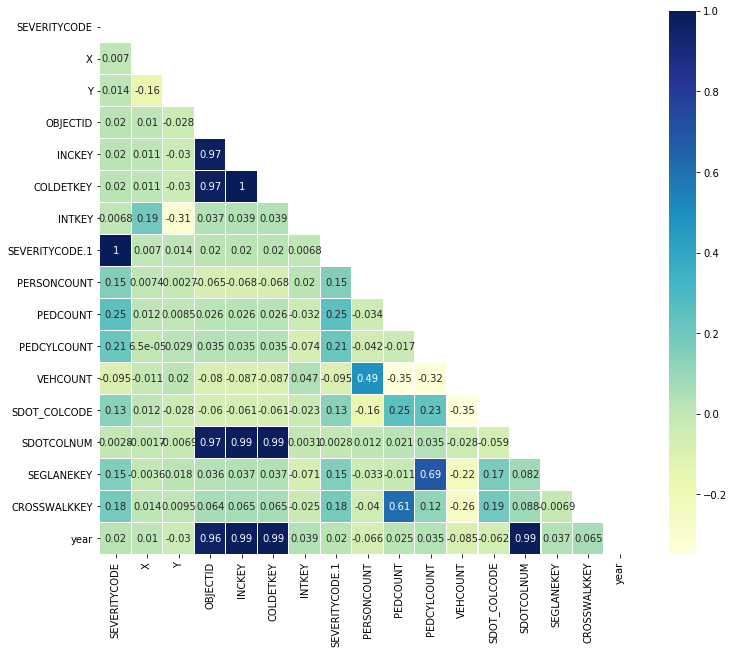

In [33]:
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))

matrix = np.triu(corrmat)
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, mask=matrix, annot = True)

Take out the 'keys and code' (since it is used for formatting report perusal),  then we have:\
PersonCount : The total number of people involved in the collision,\
PedcylCount : The number of bicycles involved in the collision,\
Vehcount : The number of vehicles involved in the collision,\
as most **predictable variable to collision type**.

Next we will see how correlate other variable in object type.

In [35]:
df_gptest1 = df[['LIGHTCOND','WEATHER','SEVERITYCODE']]
grouped_test1 = df_gptest1.groupby(['LIGHTCOND','WEATHER'],as_index= False).mean()
grouped_pivot = grouped_test1.pivot(index='LIGHTCOND',columns='WEATHER')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

SEVERITYCODE                                     \
WEATHER                  Blowing Sand/Dirt     Clear Fog/Smog/Smoke     Other   
LIGHTCOND                                                                       
Dark - No Street Lights           1.000000  1.219024       1.363636  1.333333   
Dark - Street Lights Off          0.000000  1.258120       1.235294  1.000000   
Dark - Street Lights On           1.533333  1.295277       1.317073  1.161972   
Dark - Unknown Lighting           0.000000  1.666667       0.000000  1.500000   
Dawn                              2.000000  1.339494       1.305556  1.250000   
Daylight                          1.185185  1.337612       1.344828  1.218543   
Dusk                              1.000000  1.327869       1.666667  1.090909   
Other                             0.000000  1.135135       2.000000  1.105263   
Unknown                           1.000000  1.085661       1.250000  1.053628   

                                                                             \
WEATHER                   Overcast Partly Cloudy   Raining Severe Crosswind   
LIGHTCOND                                                                     
Dark - No Street Lights   1.216216           2.0  1.241379         1.000000   
Dark - Street Lights Off  1.242424           0.0  1.350993         1.000000   
Dark - Street Lights On   1.296223           1.0  1.330549         1.333333   
Dark - Unknown Lighting   1.000000           0.0  1.200000         0.000000   
Dawn                      1.329250           2.0  1.332838         0.000000   
Daylight                  1.328748           1.5  1.346938         1.333333   
Dusk                      1.331574           0.0  1.357977         1.000000   
Other                     1.321429           0.0  1.346154         0.000000   
Unknown                   1.127877           0.0  1.145714         0.000000   

                                                                       
WEATHER                  Sleet/Hail/Freezing Rain   Snowing   Unknown  
LIGHTCOND                                                              
Dark - No Street Lights                  2.000000  1.333333  1.067961  
Dark - Street Lights Off                 1.000000  1.083333  1.084507  
Dark - Street Lights On                  1.230769  1.202797  1.092204  
Dark - Unknown Lighting                  0.000000  0.000000  0.000000  
Dawn                                     1.333333  1.212121  1.184615  
Daylight                                 1.240000  1.191950  1.112808  
Dusk                                     1.500000  1.272727  1.159341  
Other                                    1.000000  1.200000  1.068966  
Unknown                                  1.000000  1.029412  1.032216

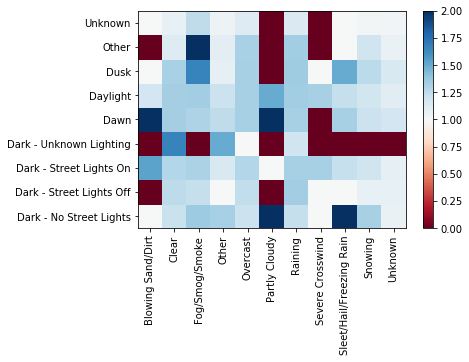

In [39]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [37]:
df_gptest2 = df[['LIGHTCOND','ROADCOND','SEVERITYCODE']]
grouped_test2 = df_gptest2.groupby(['LIGHTCOND','ROADCOND'],as_index= False).mean()
grouped_pivot2 = grouped_test2.pivot(index='LIGHTCOND',columns='ROADCOND')
grouped_pivot2 = grouped_pivot2.fillna(0) #fill missing values with 0

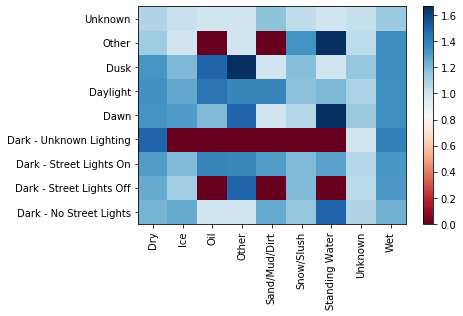

In [38]:
#use the grouped results
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot2, cmap='RdBu')

#label names
row_labels = grouped_pivot2.columns.levels[1]
col_labels = grouped_pivot2.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot2.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot2.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

From those 2 figures of data visualisation that tells combination from visibility, road condition and weather, we can easily know in which particular condition met are probable to have more severe collision.\
As conclution we can say that Lighting Condition, Road Condition and Weather are also becoming the most predictable variable to Collision.